### Image Classification on MNIST dataset using SLP

---

**Description**
- The dataset is MNIST dataset includes images of o to 9 handwritten digits. 
- The objective is to classify images into specific classes using Single Layer Perceptron.

**Dataset**
- Total Images: - 70,000
- Train Images: - 60,000 
- Test Images:- 10,000 
- Image Size:- 28 X 28

**Different Classes**: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

---

**Problem Statements - 1**
- A. Load MNIST data from Keras Library and Split the same into Train and Test.
- B. Scale the values of train and test between 0 & 1 by dividing train & test by 255

---

**Problem Statement - 2** - Display first 25 images from the training dataset and display the labels along with them.

---

**Problem Statement - 3**
- Load the data (again, important)
    - 1. Reshape the data
    >before reshaping the data - (60000, 28, 28)<br>
    >after reshaping the data - (60000, 784)
    - 2. Print the label for first image and after converting it to categorical
    >class label of the first image: 5<br>
    >After converting it to categorical: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

---

**Problem Statement - 4** - Build basic Single Layer Perceptron on the MNIST Data.
1. Single Dense 1024 Neurons
2. Input Shape being 784 
3. Activation Function Relu
4. Softmax Layer With 10 Neuron As Output
5. Loss - Categorical_Crossentropy
6. Optimizer - RMSPROP
7. Batch_Size = 5000, Epochs=50
8. Print the Accuracy and Loss Of SLP Model

---

**Problem Statement - 5** - Build basic Multilayer Perceptron on the MNIST Data.
1. Single dense layer 1024 neurons
2. Input Shape being 784 
3. Activation Function Relu
4. Second Dense Layer 512 neurons and activation relu 
5. Third Dense Layer 512 Neurons and activation relu 
6. Softmax layer with 10 neurons as output
7. Loss - categorical_crossentropy 
8. Optimizer - adam
9. batch_size = 5000, epochs = 50
10. Print the accuracy and loss of MLP model

---

**Problem Statement - 6**
- A. Build basic Convolution Neural Network on the MNIST Data.
    - Reshape the data
    >Before reshape - (28, 28)<br>
    >After reshape - (60000, 28, 28, 1)
    - Parameters
        1. Conv2D with 32 Neuron; Filter 3,3 ; Activation: Relu ; Stride (1,1)
        2. MaxPool2D ; Pool Size (2,2)
        3. Flatten the data again to send to desne layer
        4. 128 Neuron single Dense Layer with ReLu
        5. 10 neuron single dense layer with softmax as output layer
- B. Save the model into Json and .h5 file
- C. Load the model from disk

### Mounting the Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Importing modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from keras.datasets.mnist import load_data
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.models import model_from_json
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.optimizers import RMSprop, Adam
from keras.losses import categorical_crossentropy

Using TensorFlow backend.


### Question 1

#### **Remember**
*   **x_train** consists of image data in array format with size 784
*   **y_train** consists of label data indicates actual digit of image

In [3]:
# Loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train[0])

11493376/11490434 [==============================] - 2s 0us/step
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]

In [4]:
# Scaling
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [0]:
# Making sure that the values are float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

### Question 2

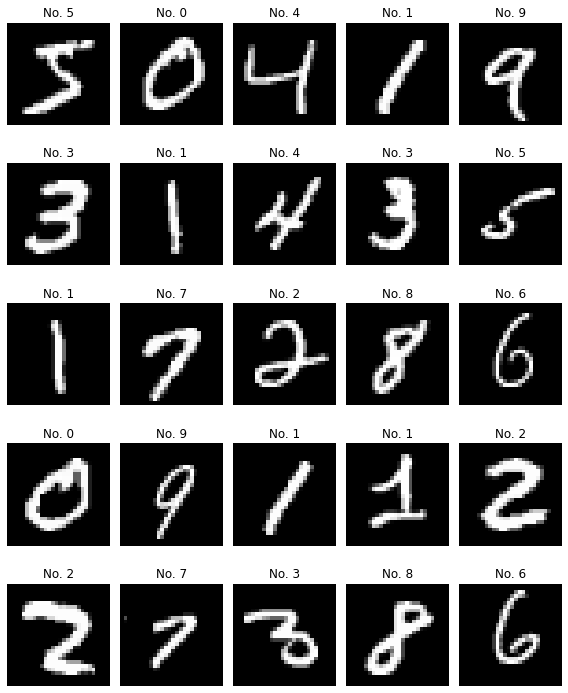

In [6]:
# First 25 images with labels
num_rows, num_cols = 5, 5

fig, ax = plt.subplots(num_rows, num_cols, figsize=(8, 10),
                       squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r, c].axis("off")
        ax[r, c].imshow(x_train[image_index], cmap='gray')
        ax[r, c].set_title('No. %d' % y_train[image_index])

plt.tight_layout()
plt.show()
plt.close()

### Question 3

In [0]:
# Reloading the data
(x_train, y_train), (x_test, y_test) = load_data()

In [8]:
print('Before reshaping the data:', x_train.shape)

Before reshaping the data: (60000, 28, 28)


In [0]:
num_channels = 1
total_pixels = x_train.shape[1] * x_train.shape[2] * num_channels
x_train = x_train.reshape((x_train.shape[0], total_pixels)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], total_pixels)).astype('float32')

In [10]:
print('After reshaping the data:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

After reshaping the data: (60000, 784)
Number of images in x_train 60000
Number of images in x_test 10000


In [11]:
print('Label of first image:', y_train[0])

Label of first image: 5


In [0]:
# One hot encoding
y_train = to_categorical(y_train, dtype='float32')
y_test = to_categorical(y_test, dtype='float32')
num_classes = y_test.shape[1]

In [13]:
print('Label of first image after categorical conversion = {}'.format(y_train[0]))

Label of first image after categorical conversion = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Question 4

In [0]:
# Hyperparameter
training_epochs = 50
batch_size = 5000
input_shape=(784,)

In [0]:
slp_model = Sequential([Dense(1024, activation='relu',
                              input_shape=input_shape), Dense(10, activation='softmax'), ])

In [0]:
rms = RMSprop()

slp_model.compile(
    optimizer=rms, loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
slp_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [18]:
slp_history = slp_model.fit(x=x_train,
                            y=y_train,
                            epochs=training_epochs,
                            batch_size=batch_size
                            )

Epoch 1/50
60000/60000 [==============================] - 2s 32us/step - loss: 135.3505 - accuracy: 0.5656
Epoch 2/50
60000/60000 [==============================] - 0s 4us/step - loss: 6.9621 - accuracy: 0.8688
Epoch 3/50
60000/60000 [==============================] - 0s 3us/step - loss: 13.1595 - accuracy: 0.8440
Epoch 4/50
60000/60000 [==============================] - 0s 3us/step - loss: 11.0741 - accuracy: 0.8721
Epoch 5/50
60000/60000 [==============================] - 0s 3us/step - loss: 2.3265 - accuracy: 0.9376
Epoch 6/50
60000/60000 [==============================] - 0s 3us/step - loss: 9.0348 - accuracy: 0.8803
Epoch 7/50
60000/60000 [==============================] - 0s 4us/step - loss: 0.9698 - accuracy: 0.9619
Epoch 8/50
60000/60000 [==============================] - 0s 3us/step - loss: 5.1414 - accuracy: 0.8999
Epoch 9/50
60000/60000 [==============================] - 0s 4us/step - loss: 1.5346 - accuracy: 0.9561
Epoch 10/50
60000/60000 [==============================] - 

The `plot_model()` function in Keras will create a plot of your network.

It takes four optional arguments:
1.   **show_shapes** (defaults to False) controls whether output shapes are shown in the graph.
2.   **show_layer_names** (defaults to True) controls whether layer names are shown in the graph.
3.   **expand_nested** (defaults to False) controls whether to expand nested models into clusters in the graph.
4.   **dpi** (defaults to 96) controls image dpi.


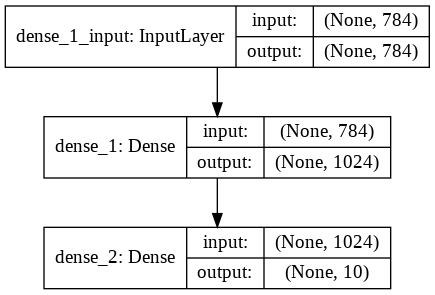

In [19]:
plot_model(slp_model, to_file='model_plot.png', show_shapes=True,
           show_layer_names=True, expand_nested=True)

In [20]:
loss, accuracy = slp_model.evaluate(x_test, y_test, verbose=True)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

10000/10000 [==============================] - 0s 49us/step
Loss:  0.4681335339541223
Accuracy:  0.9785000085830688


### Question 5

In [0]:
mlp_model = Sequential([
    Dense(1024, activation='relu', input_shape=input_shape),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax'),
])

In [0]:
adam = Adam()
mlp_model.compile(optimizer=adam,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [23]:
mlp_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 1,596,426
Trainable params: 1,596,426
Non-trainable params: 0
_________________________________________________________________


In [24]:
mlp_history = mlp_model.fit(x=x_train,
                            y=y_train,
                            epochs=training_epochs,
                            batch_size=batch_size
                            )

Epoch 1/50
60000/60000 [==============================] - 0s 7us/step - loss: 34.4902 - accuracy: 0.5110
Epoch 2/50
60000/60000 [==============================] - 0s 5us/step - loss: 2.3180 - accuracy: 0.8183
Epoch 3/50
60000/60000 [==============================] - 0s 5us/step - loss: 0.9095 - accuracy: 0.8981
Epoch 4/50
60000/60000 [==============================] - 0s 5us/step - loss: 0.4906 - accuracy: 0.9228
Epoch 5/50
60000/60000 [==============================] - 0s 5us/step - loss: 0.3296 - accuracy: 0.9335
Epoch 6/50
60000/60000 [==============================] - 0s 5us/step - loss: 0.2450 - accuracy: 0.9448
Epoch 7/50
60000/60000 [==============================] - 0s 5us/step - loss: 0.1924 - accuracy: 0.9535
Epoch 8/50
60000/60000 [==============================] - 0s 5us/step - loss: 0.1546 - accuracy: 0.9618
Epoch 9/50
60000/60000 [==============================] - 0s 5us/step - loss: 0.1272 - accuracy: 0.9675
Epoch 10/50
60000/60000 [==============================] - 0s 5

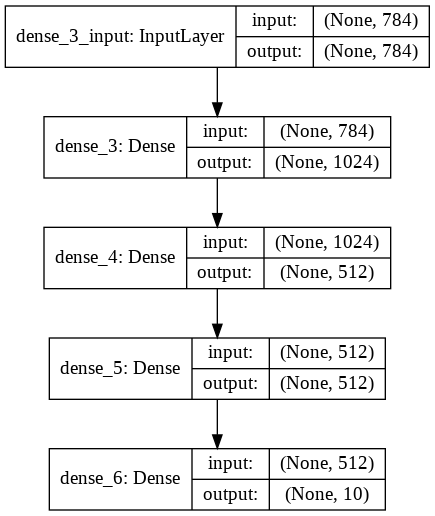

In [25]:
plot_model(mlp_model, to_file='model_plot.png', show_shapes=True,
           show_layer_names=True, expand_nested=True)

In [26]:
loss, accuracy = mlp_model.evaluate(x_test, y_test, verbose=True)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

10000/10000 [==============================] - 0s 49us/step
Loss:  0.19070752525138088
Accuracy:  0.963100016117096


### Question 6

In [0]:
# Reloading the data
(x_train, y_train), (x_test, y_test) = load_data()

In [28]:
print('Before reshaping the data:', x_train.shape)

Before reshaping the data: (60000, 28, 28)


In [0]:
x_train = x_train.reshape(
    (x_train.shape[0], x_train.shape[1], x_train.shape[2], num_channels)).astype('float32')

x_test = x_test.reshape(
    (x_test.shape[0], x_test.shape[1], x_test.shape[2], num_channels)).astype('float32')

In [30]:
print('After reshaping the data:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

After reshaping the data: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
y_train = to_categorical(y_train, dtype='float32')
y_test = to_categorical(y_test, dtype='float32')

In [0]:
model = Sequential([Conv2D(32, kernel_size=(3, 3),
                           input_shape=(x_train.shape[1], x_train.shape[2], num_channels)),
                    Activation('relu'),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(2, 2), strides=(1, 1)),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')
                    ])

In [0]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               2560128   
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [0]:
# early stopping to avoid overfitting
es = EarlyStopping(monitor='val_loss', patience=10,
                   mode='min', restore_best_weights=True)

In [36]:
history = model.fit(x=x_train,
                    y=y_train,
                    epochs=training_epochs,
                    verbose=2,
                    callbacks=[es]
                    )

Epoch 1/50
 - 18s - loss: 0.2374 - accuracy: 0.9477
Epoch 2/50


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 13s - loss: 0.0789 - accuracy: 0.9781
Epoch 3/50
 - 13s - loss: 0.0553 - accuracy: 0.9844
Epoch 4/50
 - 13s - loss: 0.0403 - accuracy: 0.9881
Epoch 5/50
 - 13s - loss: 0.0368 - accuracy: 0.9900
Epoch 6/50
 - 13s - loss: 0.0280 - accuracy: 0.9916
Epoch 7/50
 - 13s - loss: 0.0227 - accuracy: 0.9933
Epoch 8/50
 - 14s - loss: 0.0205 - accuracy: 0.9938
Epoch 9/50
 - 13s - loss: 0.0178 - accuracy: 0.9949
Epoch 10/50
 - 13s - loss: 0.0153 - accuracy: 0.9960
Epoch 11/50
 - 13s - loss: 0.0148 - accuracy: 0.9961
Epoch 12/50
 - 13s - loss: 0.0106 - accuracy: 0.9970
Epoch 13/50
 - 13s - loss: 0.0108 - accuracy: 0.9966
Epoch 14/50
 - 13s - loss: 0.0091 - accuracy: 0.9973
Epoch 15/50
 - 13s - loss: 0.0084 - accuracy: 0.9976
Epoch 16/50
 - 13s - loss: 0.0117 - accuracy: 0.9970
Epoch 17/50
 - 13s - loss: 0.0061 - accuracy: 0.9981
Epoch 18/50
 - 13s - loss: 0.0092 - accuracy: 0.9975
Epoch 19/50
 - 13s - loss: 0.0065 - accuracy: 0.9981
Epoch 20/50
 - 14s - loss: 0.0060 - accuracy: 0.9984
Epoch 21/50


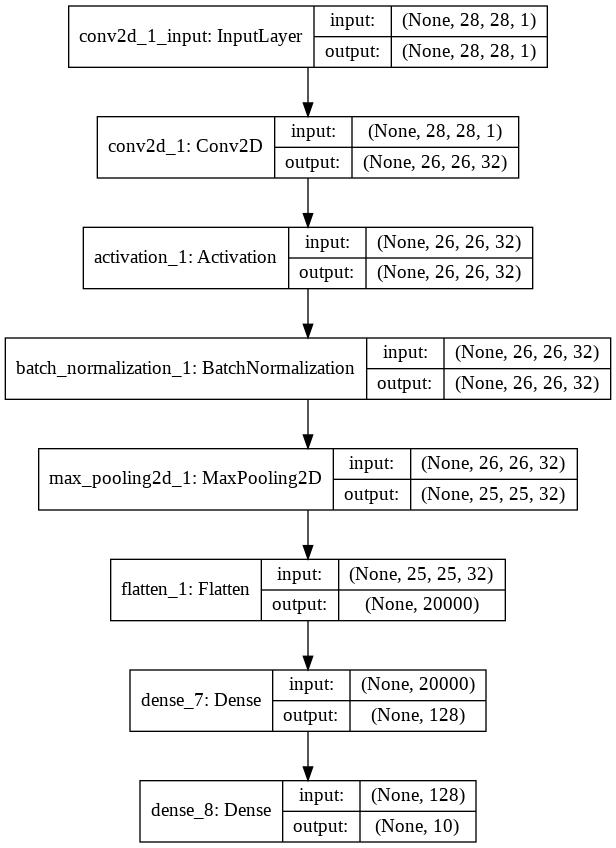

In [37]:
plot_model(model, to_file='model_plot.png', show_shapes=True,
           show_layer_names=True, expand_nested=True)

In [40]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

10000/10000 [==============================] - 1s 93us/step
Loss:  0.2441184416585902
Accuracy:  0.9828000068664551


### Saving the Model to Google Drive

In [38]:
model_json = model.to_json()

# Saving the model as JSON file
with open('/content/drive/My Drive/Colab Notebooks/Saved Models/MNISTmodel.json', 'w') as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
model.save_weights(
    '/content/drive/My Drive/Colab Notebooks/Saved Models/MNISTmodel.h5')

print('Saved model to disk')

Saved model to disk


### Loading the Model from the Google Drive

In [0]:
json_file = open(
    '/content/drive/My Drive/Colab Notebooks/Saved Models/MNISTmodel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load weights into new model
loaded_model.load_weights(
    '/content/drive/My Drive/Colab Notebooks/Saved Models/MNISTmodel.h5')

print('Loaded model from disk')